In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_curve,
classification_report
)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier




In [23]:
df = pd.read_csv("cleaned_dataset.csv")
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [3]:
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()
    entropy = 0

    for value in target_values:
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        if proportion != 0:
            entropy -= proportion * math.log2(proportion)
    return entropy

entropy_dataset = calculate_entropy(df, 'Loan_Status')
print(f"Entropy of the dataset (Loan_Status): {entropy_dataset:.3f}")

Entropy of the dataset (Loan_Status): 0.896


In [24]:
categorical_features_for_ig = [
    col for col in ['Gender', 'Married', 'Education', 'Self_Employed',
                    'Property_Area', 'Credit_History', 'Dependents']
    if col in df.columns
]

def calculate_information_gain(data, feature, target_column):
    base_entropy = calculate_entropy(data, target_column)
    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    information_gain = base_entropy - weighted_entropy
    return information_gain

print("\nInformation Gain for categorical features:")
for column in categorical_features_for_ig:
    entropy = calculate_entropy(df, column)
    ig = calculate_information_gain(df, column, 'Loan_Status')
    print(f"{column:<15} Entropy: {entropy:.3f} | InfoGain wrt Loan_Status: {ig:.3f}")



Information Gain for categorical features:
Gender          Entropy: 0.685 | InfoGain wrt Loan_Status: 0.000
Married         Entropy: 0.931 | InfoGain wrt Loan_Status: 0.006
Education       Entropy: 0.757 | InfoGain wrt Loan_Status: 0.005
Self_Employed   Entropy: 0.567 | InfoGain wrt Loan_Status: 0.000
Property_Area   Entropy: 1.577 | InfoGain wrt Loan_Status: 0.015
Credit_History  Entropy: 0.597 | InfoGain wrt Loan_Status: 0.205
Dependents      Entropy: 1.608 | InfoGain wrt Loan_Status: 0.004


In [5]:
# Split the dataset into training and testing sets
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,
    min_samples_leaf=5)
clf.fit(X_train, y_train)
id3_pred = clf.predict(X_test)

id3_accuracy = accuracy_score(y_test, id3_pred)

print("\n===ID3-style Decision Tree Results")
print(f"Accuracy: {id3_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, id3_pred))



===ID3-style Decision Tree Results
Accuracy: 0.854

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



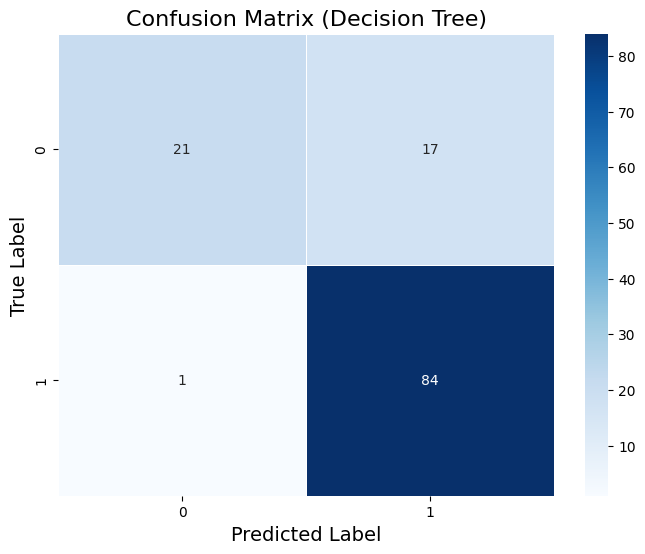

In [7]:
id3_confusion_matrix = confusion_matrix(y_test, id3_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(id3_confusion_matrix, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.title("Confusion Matrix (Decision Tree)", fontsize=16)
plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)
plt.show()

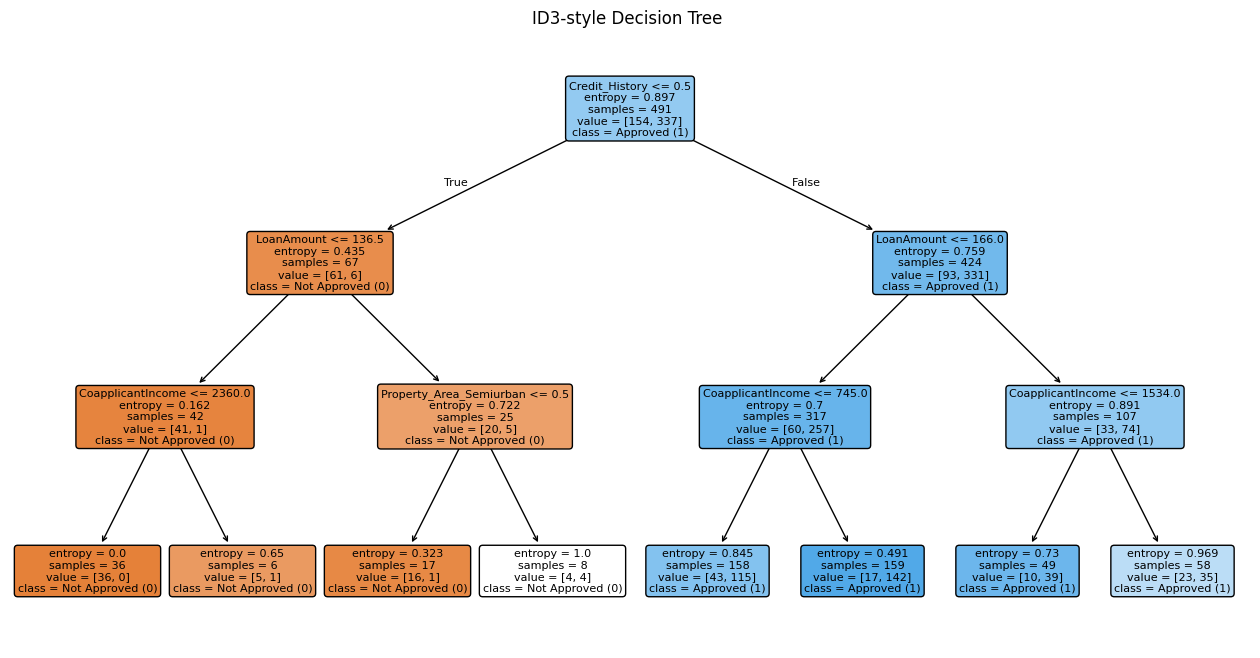

In [8]:
plt.figure(figsize=(16, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not Approved (0)', 'Approved (1)'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("ID3-style Decision Tree ")
plt.show()

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, log_pred)

print("\n===Logistic Regression Results===")
print(f"Accuracy: {log_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, log_pred))



===Logistic Regression Results===
Accuracy: 0.862

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



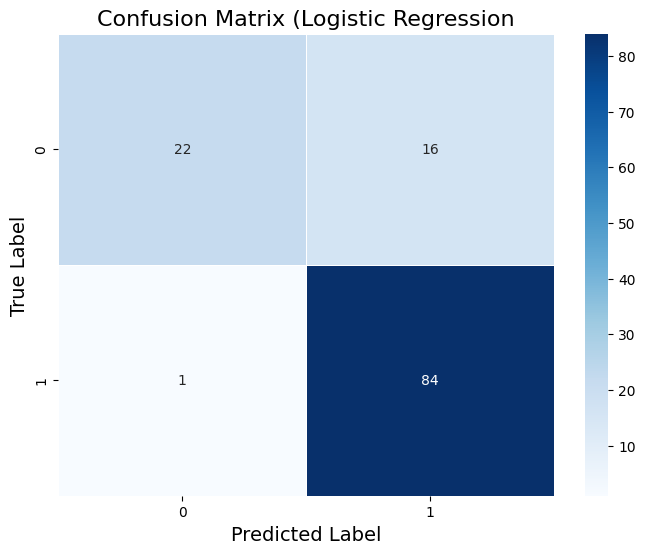

In [21]:
log_confusion_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(log_confusion_matrix, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.title("Confusion Matrix (Logistic Regression", fontsize=16)
plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)
plt.show()

In [11]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)

print("===Random Forest Results===")
print(f"Accuracy: {rf_accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))


===Random Forest Results===
Accuracy: 0.837

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.86      0.92      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.79      0.80       123
weighted avg       0.83      0.84      0.83       123



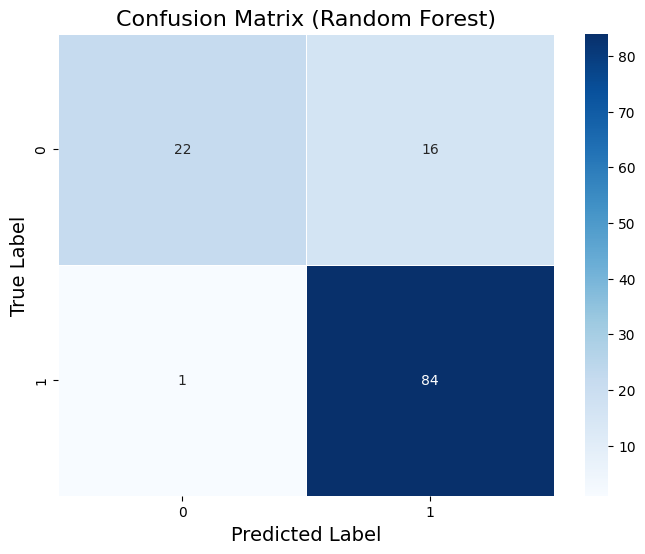

In [12]:
rf_confusion_matrix = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap="Blues", fmt="d", linewidths=.5)
plt.title("Confusion Matrix (Random Forest)", fontsize=16)
plt.ylabel("True Label", fontsize=14)
plt.xlabel("Predicted Label", fontsize=14)
plt.show()

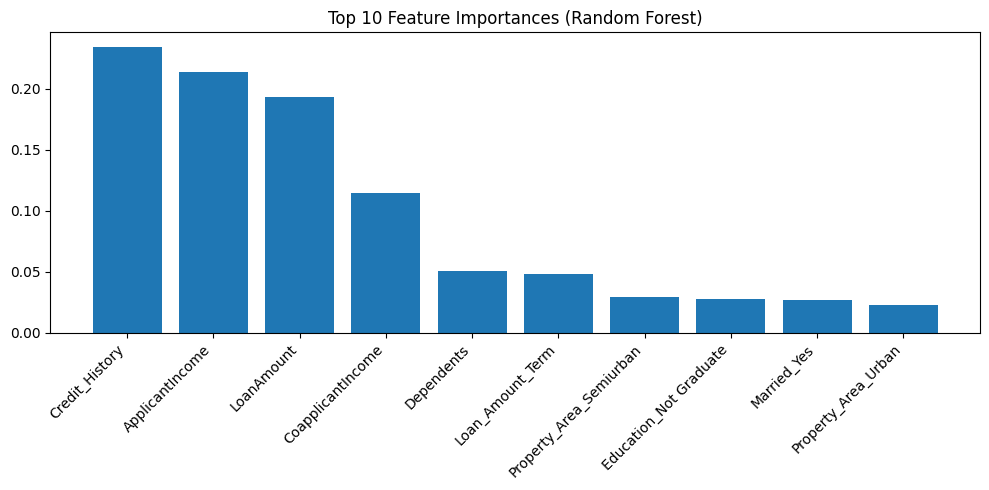

In [13]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=45, ha='right')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [14]:

id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

y_id3_proba = id3_model.predict_proba(X_test)[:, 1]

id3_pred = id3_model.predict(X_test)


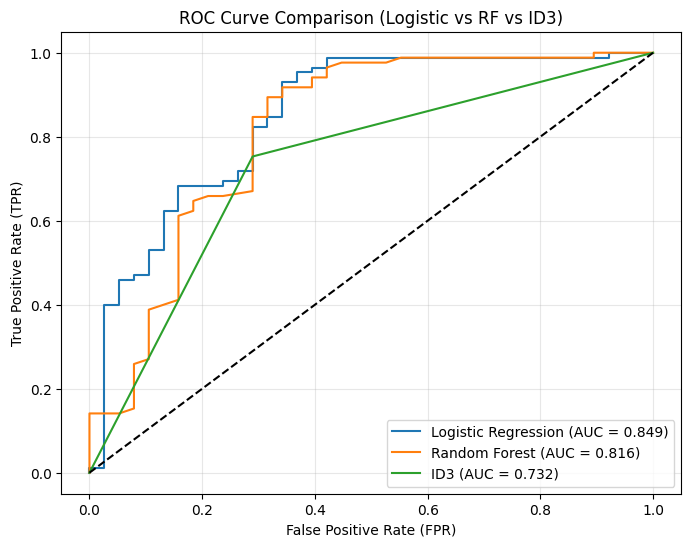

In [15]:

plt.figure(figsize=(8, 6))

# 1. Logistic Regression
y_log = log_model.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_log)
auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")

# 2. Random Forest
y_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

# 3. ID3 Decision Tree
y_id3 = id3_model.predict_proba(X_test)[:, 1]   # ← ID3 的概率
fpr_id3, tpr_id3, _ = roc_curve(y_test, y_id3)
auc_id3 = auc(fpr_id3, tpr_id3)
plt.plot(fpr_id3, tpr_id3, label=f"ID3 (AUC = {auc_id3:.3f})")

# baseline
plt.plot([0, 1], [0, 1], 'k--')

# setup
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison (Logistic vs RF vs ID3)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Model Comparison (Based on AUC)

## 1. AUC Performance
- **Logistic Regression: AUC = 0.849 (highest)**
- Random Forest: AUC = 0.816
- ID3 Decision Tree: AUC = 0.732 (lowest)

Logistic Regression shows the strongest overall discriminative ability.

---

## 2. ROC Curve Comparison
- Logistic Regression’s ROC curve stays consistently above the other two models.
- Random Forest performs moderately, with a curve below Logistic Regression but above ID3.
- ID3’s ROC curve is closest to the diagonal baseline, indicating weak separation ability.

**AUC Ranking:**
1. **Logistic Regression**
2. Random Forest
3. ID3 Decision Tree

---

# Insights (AUC-based)

## 1. Why Logistic Regression Performs Best
- AUC of 0.849 is considered excellent. It indicates that Logistic Regression performs well at distinguishing between the two classes (approved vs. denied loans).
- Produces smooth probability estimates and is less prone to overfitting.
- Linear model fits the structure of this dataset well.

---

## 2. Why Random Forest Performs Moderately
- AUC of 0.816 is good, but slightly lower than Logistic Regression. It indicates that Random Forest is still performing well, but not as well as Logistic Regression in this case.
- Works well with nonlinear patterns but dataset size (123 samples) may limit performance.
- Probability outputs from ensembles are slightly less stable at small data scales.
-The Random Forest curve is also above the diagonal line, showing better performance than random guessing

---

## 3. Why ID3 Performs the Worst
- Single-tree structure overfits small datasets easily.need larger dataset
- ROC curve close to the baseline indicates limited discriminative power.
- Probability estimates are not as reliable or smooth as the other models.

---

# Final Conclusion
**Based on AUC, Logistic Regression is the best-performing model overall**,
In conclusion, 3 models reveals notable differences in their AUC and performance characteristics. Logistic Regression outperforms the others with an AUC of 0.849, indicating its strong discriminative ability and smooth probability estimates, making it ideal for datasets with a linear structure. However, it may struggle with more complex, nonlinear patterns. Random Forest (AUC = 0.816) performs well, especially with nonlinear relationships, but its performance is slightly weaker due to the limited dataset size, which impacts the stability of its probability outputs. ID3 (AUC = 0.732) shows the poorest performance, with its ROC curve closely resembling the baseline, indicating weak separation power. While ID3 is simple and interpretable, it tends to overfit small datasets, making it less reliable for this case.


In [29]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# ---------------------------------------------------------
#  BLUE instruction styles
# ---------------------------------------------------------
def blue(text):
    return f"<span style='color:#007BFF; font-size:13px;'>{text}</span>"


# ---------------------------------------------------------
#  Custom descriptions for each feature (editable!)
# ---------------------------------------------------------
feature_descriptions = {
    "Gender_Male": "1 = Male, 0 = Female",
    "Married_Yes": "1 = Married, 0 = Not Married",
    "Dependents": "Number of dependents: 0,1,2,3+",
    "Education_Graduate": "1 = Graduate, 0 = Not Graduate",
    "Self_Employed_Yes": "1 = Self-employed, 0 = Not",
    "ApplicantIncome": "Applicant monthly income",
    "CoapplicantIncome": "Co-applicant monthly income",
    "LoanAmount": "Loan amount you apply for (in thousands)",
    "Loan_Amount_Term": "Loan duration in months",
    "Credit_History": "1 = Good, 0 = Bad",
    "Property_Area_Rural": "1 = Rural, 0 = Otherwise",
    "Property_Area_Semiurban": "1 = Semiurban, 0 = Otherwise",
    "Property_Area_Urban": "1 = Urban, 0 = Otherwise"
}

default_desc = "1 = Not Graduated, 0 = Graduated"


# ---------------------------------------------------------
#  MODEL SELECTION
# ---------------------------------------------------------
model_selector = widgets.Dropdown(
    options=["Logistic Regression", "Random Forest", "ID3 Decision Tree"],
    value="Logistic Regression",
    description="Model:",
    style={'description_width': '120px'},
    layout=widgets.Layout(width='300px')
)


# ---------------------------------------------------------
#  FEATURE INPUT WIDGETS → LABEL + INPUT + BLUE TEXT
# ---------------------------------------------------------
feature_inputs = {}
feature_rows = []

for col in X.columns:

    # label on the left
    label = widgets.Label(
        value=col + ":",
        layout=widgets.Layout(width='200px')
    )

    # numeric input box
    input_box = widgets.FloatText(
        value=0.0,
        layout=widgets.Layout(width='120px')
    )

    # save input widget for prediction use
    feature_inputs[col] = input_box

    # blue instruction text on right
    instruction = feature_descriptions.get(col, default_desc)
    hint = widgets.HTML(
        value=blue(f"({instruction})"),
        layout=widgets.Layout(width='280px')
    )

    # combine: label | input | instruction
    row = widgets.HBox([label, input_box, hint])
    feature_rows.append(row)


# ---------------------------------------------------------
#  Buttons
# ---------------------------------------------------------
predict_btn = widgets.Button(
    description="Make Prediction",
    button_style="info",
    layout=widgets.Layout(width='200px')
)

plot_btn = widgets.Button(
    description="Show ROC Curve",
    button_style='success',
    layout=widgets.Layout(width='200px')
)

output_area = widgets.Output()


# ---------------------------------------------------------
#  PREDICT FUNCTION
# ---------------------------------------------------------
def on_predict_clicked(b):
    clear_output(wait=True)
    display(ui)

    input_data = {col: feature_inputs[col].value for col in X.columns}
    input_df = pd.DataFrame([input_data])

    model_name = model_selector.value

    if model_name == "Logistic Regression":
        proba = log_model.predict_proba(scaler.transform(input_df))[:, 1][0]
        pred  = log_model.predict(scaler.transform(input_df))[0]

    elif model_name == "Random Forest":
        proba = rf_model.predict_proba(input_df)[:, 1][0]
        pred  = rf_model.predict(input_df)[0]

    else:  # ID3
        proba = id3_model.predict_proba(input_df)[:, 1][0]
        pred  = id3_model.predict(input_df)[0]

    with output_area:
        clear_output()
        print(f"Selected Model: {model_name}")
        print(f"Prediction: {pred}")
        print(f"Probability of Class 1: {proba:.4f}")


predict_btn.on_click(on_predict_clicked)


# ---------------------------------------------------------
#  ROC CURVE
# ---------------------------------------------------------
def on_plot_clicked(b):
    clear_output(wait=True)
    display(ui)

    plt.figure(figsize=(6, 5))

    if model_selector.value == "Logistic Regression":
        proba = log_model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, proba)
        plt.title("ROC Curve — Logistic Regression")

    elif model_selector.value == "Random Forest":
        proba = rf_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, proba)
        plt.title("ROC Curve — Random Forest")

    else:
        proba = id3_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, proba)
        plt.title("ROC Curve — ID3 Decision Tree")

    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


plot_btn.on_click(on_plot_clicked)


# ---------------------------------------------------------
#  FINAL UI
# ---------------------------------------------------------
ui = widgets.VBox([
    widgets.HTML("<h3>Interactive Classification Dashboard</h3>"),
    model_selector,
    widgets.HTML("<b>Input Features:</b>"),
    widgets.VBox(feature_rows),   # all HBoxes stacked vertically
    widgets.HBox([predict_btn, plot_btn]),
    output_area
])

ui


